## ML - Do it yourself
In this notebook we will get a feel for data generation and a few models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Gaussian distribution
- Use np.random.randn to sample 1000 numbers independently from the N(0,1) distribution. This means a random normal (or gaussian) variable with mean 0 and standard deviation 1.

In [2]:
x = np.random.randn(1000,1)

### Convert to pandas dataframe

In [3]:
df = pd.DataFrame(x)

### Histogram
- Use np.histogram to compute histogram for x using bins [-3,-2] , [-2,1], ... , [2,3].
- Use df.hist for the same reason (bonus = plot).
- Use plt.hist to plot histogram of x.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f584707b8>]],
      dtype=object)

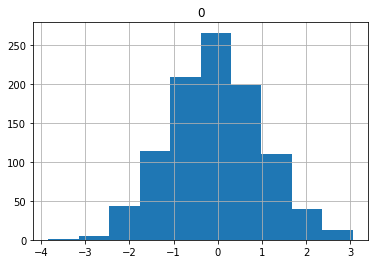

In [4]:
hist, bins = np.histogram(x, bins=range(-3,4))
df.hist()

(array([  1.,   5.,  44., 114., 209., 266., 199., 110.,  40.,  12.]),
 array([-3.83476887, -3.14547646, -2.45618405, -1.76689164, -1.07759923,
        -0.38830682,  0.30098559,  0.990278  ,  1.67957041,  2.36886282,
         3.05815523]),
 <a list of 10 Patch objects>)

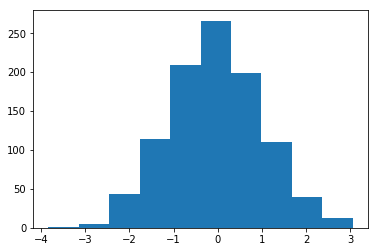

In [5]:
plt.hist(x)

### Multivariate gaussian
- Use np.random.randn to sample 1000 two-dimensional vectors independently from the N(0,1) distribution.
- Mean value should be (0,0), and the two components of the vector should be independent. Also each sample should be independent.

(The second requirement is true by default)


In [6]:
twoD = np.random.randn(1000,2)

### Scatterplot
- Split twoD into two arrays representing the two dimensions.
- Use plt.scatter to draw the scatter plot.

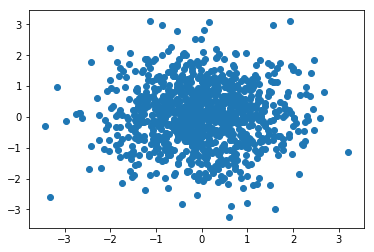

In [7]:
x = twoD[:,0]
y = twoD[:,1]
plt.scatter(x,y)

### Scale and translate
- Transform twoD by scaling both axes by 2.
- Transform twoD by adding 5 to x and subtracting 5 from y.
- Compute mean (along axis 0) and standard deviation as a sanity check. Means should be close to [1,-1] and standard deviations should be close to [2,2].
- Draw the scatter plot again.

In [8]:
twoD *= 2
twoD[:,0] += 5
twoD[:,1] -= 5

### Append more rows
- Sample another 1000 samples of 2D gaussian distribution, again N(0,1) independent entries.
- Create a concatenated 2D array with twoD followed by the additional samples. For this use np.vstack.

In [9]:
twoD2 = np.random.randn(1000,2)
X = np.vstack([twoD, twoD2])

In [10]:
assert twoD2.shape == (1000,2)
assert X.shape == (2000,2)

### Adding labels
- Make a numpy array with shape (2000,1): 1000 entries of 1 followed by 1000 entries of -1. For this use np.ones and np.vstack. Note that np.ones will need a tuple or similar as argument. (By the way np.zeros is a similar function).
- Stack this to the right of X to obtain a (2000,3) shaped array.

In [11]:
Y = np.vstack([np.ones((1000,1)),-1*np.ones((1000,1))])
data = np.hstack([X, Y])

In [12]:
assert Y.shape == (2000,1)
assert Y.sum() == 0
assert Y[0] == 1
assert data.shape == (2000,3)
assert data[:,2].sum() == 0

### Scatter plot
- The first 1000 rows with gray. Color is set by the named argument c.
- The remaining rows with pink.

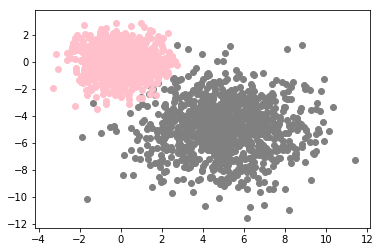

In [13]:
plt.scatter(twoD[:,0], twoD[:,1], c='gray')
plt.scatter(twoD2[:,0], twoD2[:,1], c='pink')

### Shuffle the rows
- Use np.random.permutation to create a random index to shuffle the rows with.
- Use indexing to create a shuffled version of the data.
- Do the same using np.random.shuffle.

In [14]:
perm = np.random.permutation(2000)
data = data[perm]
np.random.shuffle(data)

In [15]:
assert data[:,2].sum() == 0

### Training with without a lib
For the sport of it we will do our own version of gradient descent and see if we can learn something!

First off, we will use the data set we just created and build a linear binary classifier for it.
That is, $h(x,y) = ax + by + c$.

The last term is called the bias term. Note that the classifier is a dot-product of vectors:

$h(x,y) = w \cdot X$, where

$w = [a,b,c]$, and

$X = [x,y,1]$.

Thus we have three things at play, the hypothesis $h$, its weight vector $w$, and an augmented feature vector $X$.
Note that implementing the bias by adding this last 'always-on' feature to $X$ makes the formula for $h$ very elegant.

Now imagine we have a loss function $L$, but we haven't decided quite yet which loss function we want.
For each example $(X,c)$, where $c$ is the target, the loss for that example is $L = L(h(X),c)$. We can see this as having one loss-function for $c=-1$ and one for $c=1$, but for this example we are using one of these. To simplify further and lets assume $L = L(ch(X))$.

Let's differentiate one of these with respect to one of the weights $w_i$:

$$\frac{\partial L}{\partial w_i} = L'(ch(X)) \frac{\partial ch(X)}{\partial w_i} = L'(ch(X)) \frac{\partial (w \cdot X)}{\partial w_i} = cL'(ch(X))X_i$$.

Putting the three partial derivatives in one vector gives us the gradient of the loss

$$\nabla_w L = cL'(ch(X))X$$.

Let's pause and examine. The number $cL'(ch(X))$, whatever it is can be seen as a weight or importance of the example X. What gradient descent now wants to do is add $\nabla_w L$ to the weight vector $w$. So some conclusions:

- The update to $w$ is a linear combination of all the examples $X$.
- In general $w = w_0 + X^T W$, that is, a (small) start value plus a linear combination of the training examples.
- To compute the gradient, we don't need a formula for $L$, we can design $L'$ directly!

In general it is better to have a loss function that focuses on the biggest mistakes. An idea we can try is to let
$$L'(h(X),c) = e^{-ch(X)}$$.

So if $c=1$, the examples with lowest $h(X)$ will be seen as the most important mistakes, and for $c=-1$, the training will focus on examples with highest $h(X)$.

We have to apply one trick. This loss will strongly focus on the single or few biggest mistakes which makes learning unstable and noisy. A remedy is to take the median of $L'$ over all examples and truncate $L'$ at a maximum of the median value.

Finally we will normalize the example weights so that they sum to $1$.

### Exercise
- Define the derivative of L as a function to be the exponential function above. Use np.exp.
- Note that we want L' and not cL'.
- The function has only one argument s, which means the caller should provide the value $s=ch(X)$.
- Name the function dL.

In [16]:
def dL(s):
    return np.exp(-s)

### Exercise
- Define the hypothesis as a function h(X,w).
- The weight vector w has shape (3,).
- The input X is a numpy array with shape (N,3).
- The output is a numpy array with shape (N,).

Comment: the output represents the classifier's score for all of the $N$ examples.

Hint: You can use matrix multiplication or indexing.

In [17]:
def h(X,w):
    return np.matmul(X,w)

### Exercise
- Create X by copying data.
- Replace the target column's values by all 1's.

In [18]:
X = data.copy()
X[:,2] = 1

### Exercise
- Fill in the gaps in the fit method below, indicated by tripple comments ###.

accuracy for epoch 0 is 0.6865
accuracy for epoch 1 is 0.8445
accuracy for epoch 2 is 0.935
accuracy for epoch 3 is 0.9545
accuracy for epoch 4 is 0.9665
accuracy for epoch 5 is 0.9705
accuracy for epoch 6 is 0.974
accuracy for epoch 7 is 0.9755
accuracy for epoch 8 is 0.979
accuracy for epoch 9 is 0.9795
accuracy for epoch 10 is 0.981
accuracy for epoch 11 is 0.981
accuracy for epoch 12 is 0.981
accuracy for epoch 13 is 0.982
accuracy for epoch 14 is 0.982
accuracy for epoch 15 is 0.982
accuracy for epoch 16 is 0.9825
accuracy for epoch 17 is 0.9835
accuracy for epoch 18 is 0.984
accuracy for epoch 19 is 0.984


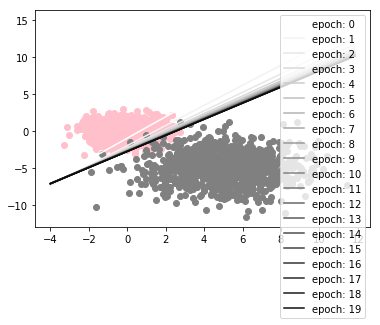

In [19]:
# Learning rate, try different values if you want. What is the connection to epochs?
lr = 1.5
# Epochs is the number of passes through the data and also the number of weight updates.
epochs = 20

# x values for plotting
ticks = [-4 + 0.16*t for t in range(100)]

# plot data 
plt.scatter(twoD2[:,0], twoD2[:,1], c='pink')
plt.scatter(twoD[:,0], twoD[:,1], c='gray')

# initialization of weights
w = np.random.randn(3)

for epoch in range(epochs):
    # compute gradient
    scores = h(X,w)
    sign_scores = scores * data[:,2]
    acc = (sign_scores > 0).sum()/2000
    print('accuracy for epoch %s is %s' % (epoch, acc))
    example_weights = dL(sign_scores)
    median = np.median(example_weights)
    example_weights = np.array([w if w < median else median for w in example_weights])
    example_weights /= example_weights.sum()
    example_weights = example_weights * data[:,2]
    grad = np.matmul(X.T,example_weights)
    # update weights
    w += lr*grad
    a, b, c = w
    # y-values of the decision boundary line
    boundary_y = [-(a*x + c)/b for x in ticks]
    boundary_y = [b if b < 15 else 15 for b in boundary_y]
    boundary_y = [b if b > -15 else -15 for b in boundary_y]
    gray = 1-epoch/epochs
    plt.plot(ticks, boundary_y, label='epoch: ' + str(epoch), c = (gray,gray,gray))
    
plt.legend()
plt.show()

### Sklearn
Sklearn, or scikit-learn, is a very popular, lightweight and easy to use library for machine learning.
It allows you to train models using a few lines of code but still is flexible for extension, varying algorithms, metrics, loss-functions and other hyper parameters.

We will train a logistic regression model for the same data set as above.

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
reg = LogisticRegression()

ML algorithms, or Inducers, in sklearn have few but important methods. Take a look at the help for 'fit' and 'predict'. Also if you type reg.<tab\> you will see what methods are supported.

### Exercise
- Fit the logistic regression model to data

In [22]:
reg.fit(data[:,:-1], data[:,-1])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We can see all the values of hyperparameters used above. We can also programatically access them:

In [23]:
reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

The weights can be accessed like so:

In [24]:
a,b = reg.coef_[0]
c = reg.intercept_[0]
(a,b,c)

(1.7741532994549611, -1.6655611802463823, -6.027699050078427)

### Plot
We use the same code as above to plot the logistic regression decision boundary.

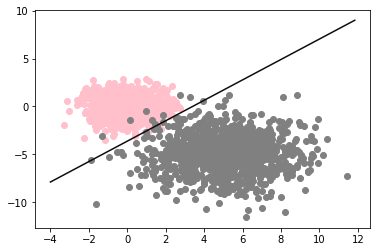

In [25]:
plt.scatter(twoD2[:,0], twoD2[:,1], c='pink')
plt.scatter(twoD[:,0], twoD[:,1], c='gray')
ticks = [-4 + 0.16*t for t in range(100)]
boundary_y = [-(a*x + c)/b for x in ticks]
boundary_y = [b if b < 15 else 15 for b in boundary_y]
boundary_y = [b if b > -15 else -15 for b in boundary_y]
gray = 1-epoch/epochs
plt.plot(ticks, boundary_y, label='epoch: ' + str(epoch), c = (gray,gray,gray))


### Exercise
- Get the model's predictions for the entire data set.
- Compute the accuracy of the classifier on the training set.

In [26]:
pred = reg.predict(data[:,:-1])

In [27]:
(pred == data[:,-1]).sum()/2000

0.993

### Exercise
- Perform 5-fold cross validation with logistic regression by using cross_val_score.
- The evaluation metric is accuracy.
- Only 1 line of code!

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
reg = LogisticRegression()
cross_val_score(reg, data[:,:-1], data[:,-1], scoring='accuracy', cv=5)

array([0.9975, 0.985 , 0.9975, 0.9925, 0.9925])

For other metrics see http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

## Learning Curve

In [30]:
from sklearn.model_selection import learning_curve

### Exercise
- Retrain the logistic regression model above but use sklearn's validation_curve method to get training and validation scores over training iterations. Specify train_sizes=np.linspace(0.1, 1.0, 200) and use 5 fold cross validation.
- Average the output scores over folds.
- Plot train scores and test scores in the same plot.
- Repeat the above for "neg_log_loss" instead of accuracy.

In [31]:
sizes, train_scores, test_scores = learning_curve(LogisticRegression(), data[:,:-1], data[:,-1], cv=5, scoring='accuracy', train_sizes=np.linspace(0.1,1.0,200))

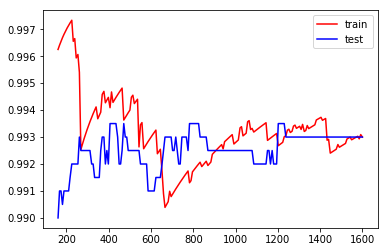

In [32]:
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(sizes, train_scores_mean, c='red', label='train')
plt.plot(sizes, test_scores_mean, c='blue', label='test')
plt.legend()

In [33]:
sizes, train_scores, test_scores = learning_curve(LogisticRegression(), data[:,:-1], data[:,-1], cv=5, scoring='neg_log_loss', train_sizes=np.linspace(0.1,1.0,200))

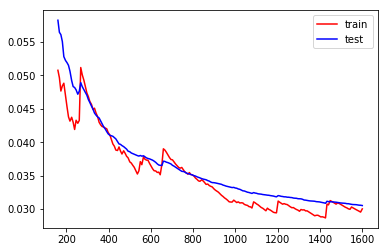

In [34]:
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(sizes, -train_scores_mean, c='red', label='train')
plt.plot(sizes, -test_scores_mean, c='blue', label='test')
plt.legend()